In [162]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [163]:
pd.set_option('display.max_columns', None)

In [164]:
data=pd.read_csv('vehicle-1.csv')

In [165]:
datao=data.copy()

# EDA

In [166]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [167]:
data.shape

(846, 19)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [169]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

# NaN Value Check

Missing values are present in the data - columns shown below:

 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyration.1  842 non-null    float64
 14  skewness_about               840 non-null    float64
 15  skewness_about.1             845 non-null    float64
 16  skewness_about.2             845 non-null    float64

In [170]:
nc_df=data.isna().apply(pd.value_counts)   #null value check
nc_df

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

# Checking for outliers 

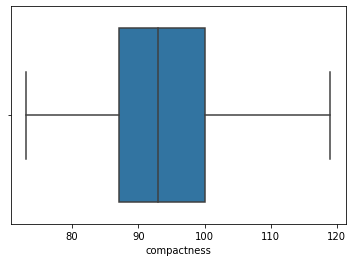

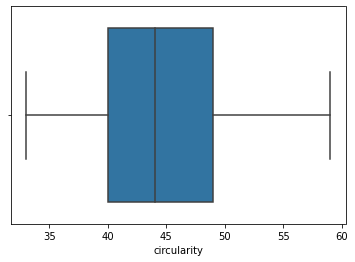

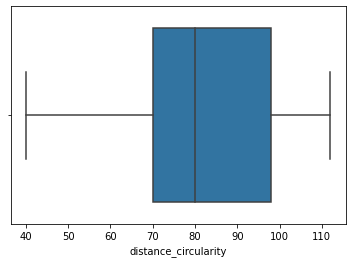

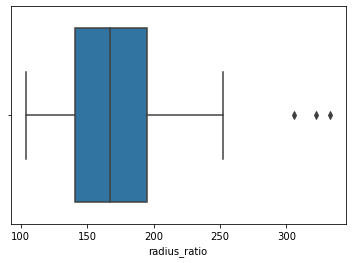

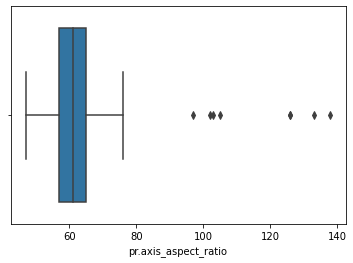

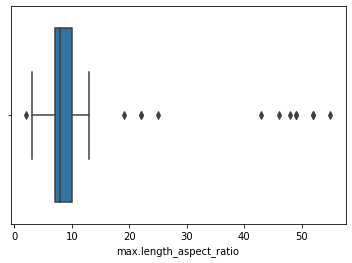

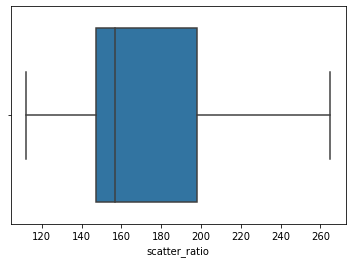

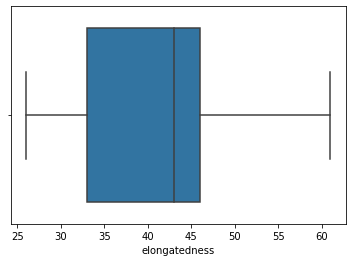

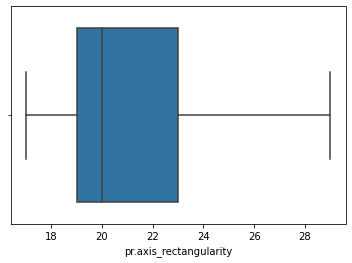

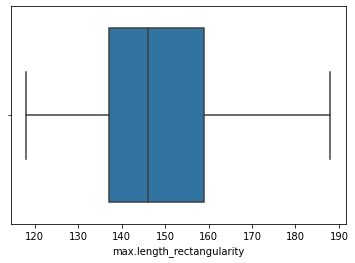

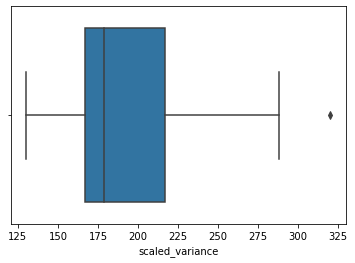

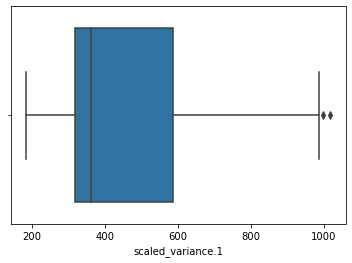

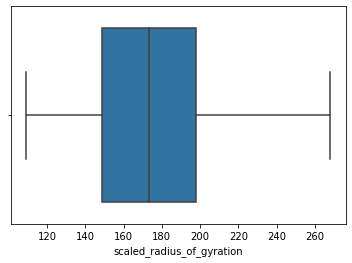

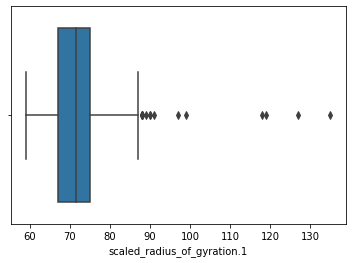

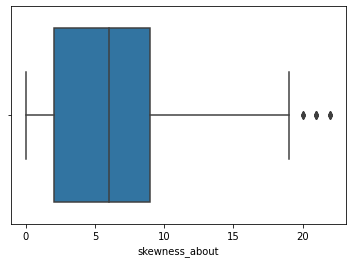

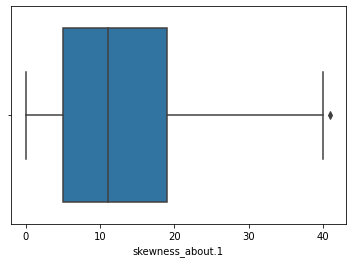

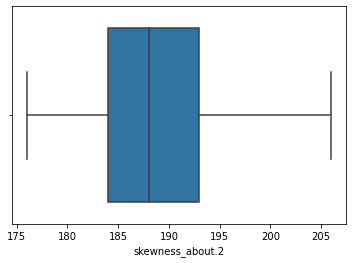

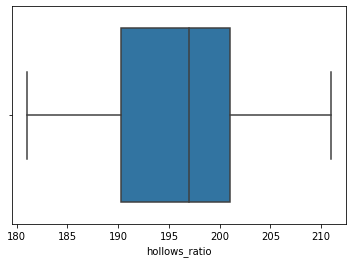

In [171]:

for col in data.columns:
    if data[col].dtype != object:
        sns.boxplot(x=data[col])
        plt.show()

In [172]:
cols_with_outliers=[]
for value in data.columns:
    if data[value].dtype != object:
        q1 = data[value].quantile(0.25) #first quartile value
        q3 = data[value].quantile(0.75) # third quartile value
        iqr = q3-q1 #Interquartile range
        low  = q1-2*iqr #acceptable range
        high = q3+2*iqr #acceptable range
        data_exclude = data.loc[(data[value] < low) | (data[value] > high)] #not meeting the acceptable range
        
        #tracking columns with outliers
        if len(data_exclude)>0:
            cols_with_outliers.append(value)


In [173]:
#columns with large outliers present taking threshold as 2*IQR
cols_with_outliers

['radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scaled_variance',
 'scaled_radius_of_gyration.1']

# NaN value treatment

In [174]:
#columns with null values
nc_df_t=nc_df.iloc[1:].T
nc_df_t_c=nc_df_t[nc_df_t[1]>=1]
nc_df_t_c.reset_index()

index  True
0                   circularity   5.0
1          distance_circularity   4.0
2                  radius_ratio   6.0
3          pr.axis_aspect_ratio   2.0
4                 scatter_ratio   1.0
5                 elongatedness   1.0
6        pr.axis_rectangularity   3.0
7               scaled_variance   3.0
8             scaled_variance.1   2.0
9     scaled_radius_of_gyration   2.0
10  scaled_radius_of_gyration.1   4.0
11               skewness_about   6.0
12             skewness_about.1   1.0
13             skewness_about.2   1.0

In [175]:
cols_with_nan=list(nc_df_t_c.index)
cols_with_nan

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

For Columns with no outliers containing null values


In [176]:
#cols_with_nan-cols_with_outliers

no_cn=[x for x in cols_with_nan if x not in cols_with_outliers]
no_cn

['circularity',
 'distance_circularity',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [177]:
#Replacing with mean values
for i in no_cn:
    mean_val=data[i].mean()
    data[i].fillna(mean_val,inplace=True)

In [178]:
data[data['circularity'].isnull()==True]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

For Columns with outliers containing null values


In [179]:
#cols_with_outliers union cols_with_nan

no_un=[x for x in cols_with_outliers if x in cols_with_nan]
no_un

['radius_ratio',
 'pr.axis_aspect_ratio',
 'scaled_variance',
 'scaled_radius_of_gyration.1']

In [180]:
#Replacing with median values
for i in no_un:
    median_val=data[i].median()
    data[i].fillna(median_val,inplace=True)

# Finding relationship between independent & dependent variables

In [181]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [182]:
#encoding class variable
for i,val in enumerate(data['class']):
    if val=='car':
        data['class'][i]=1
    if val=='bus':
        data['class'][i]=2
    if val=='van':
        data['class'][i]=3
    
        

<ipython-input-182-440b1e2e3743>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][i]=3
<ipython-input-182-440b1e2e3743>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][i]=1
<ipython-input-182-440b1e2e3743>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][i]=2


In [183]:
data['class']=data['class'].astype(int)

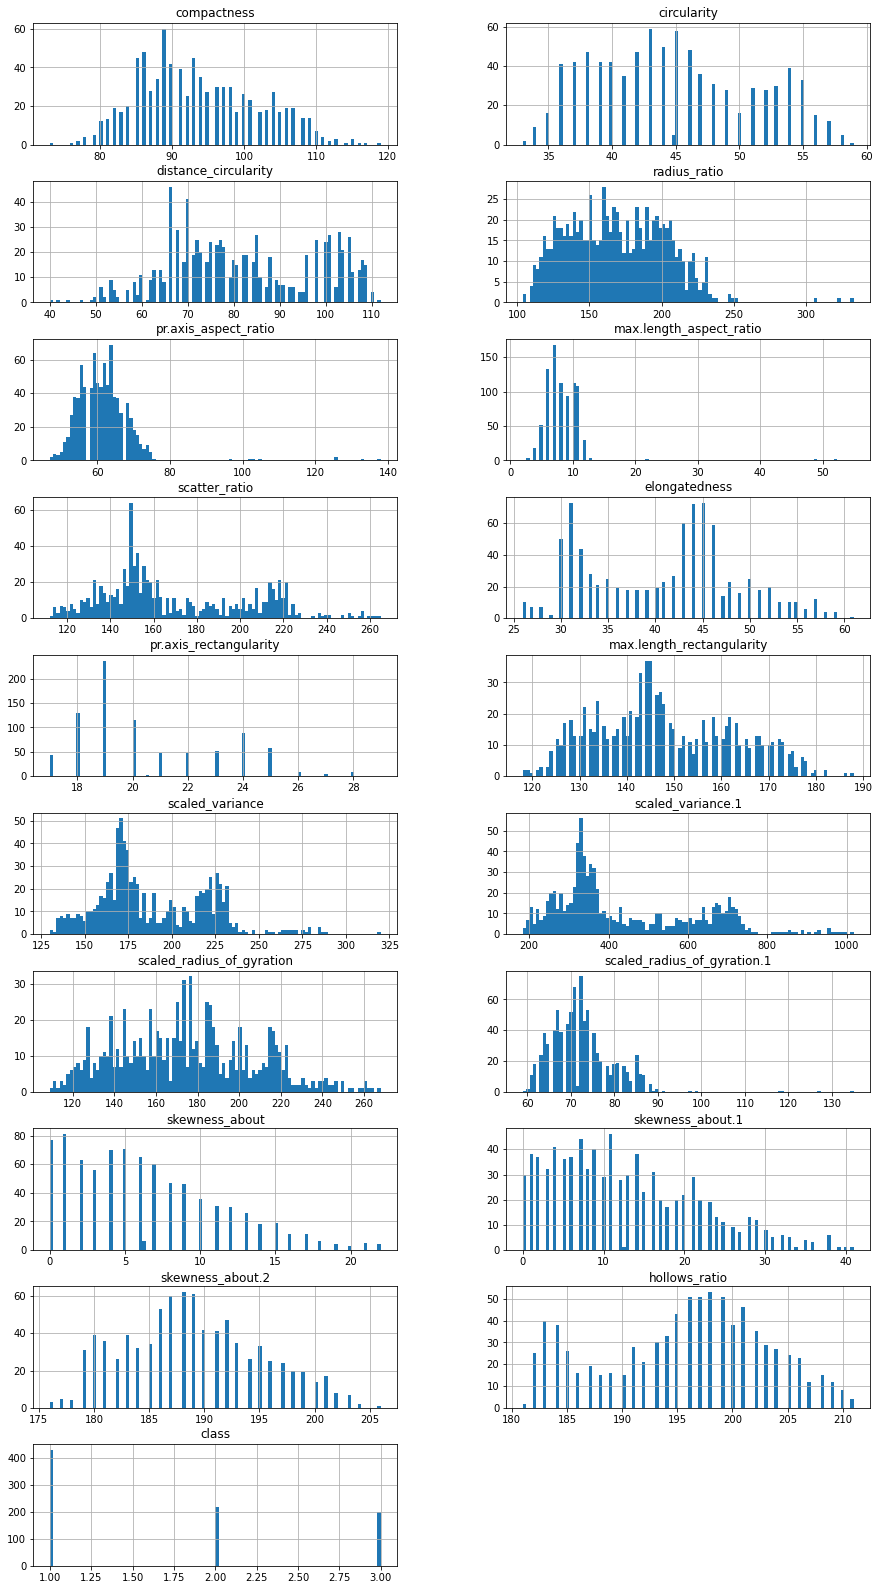

In [184]:
data.hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2));

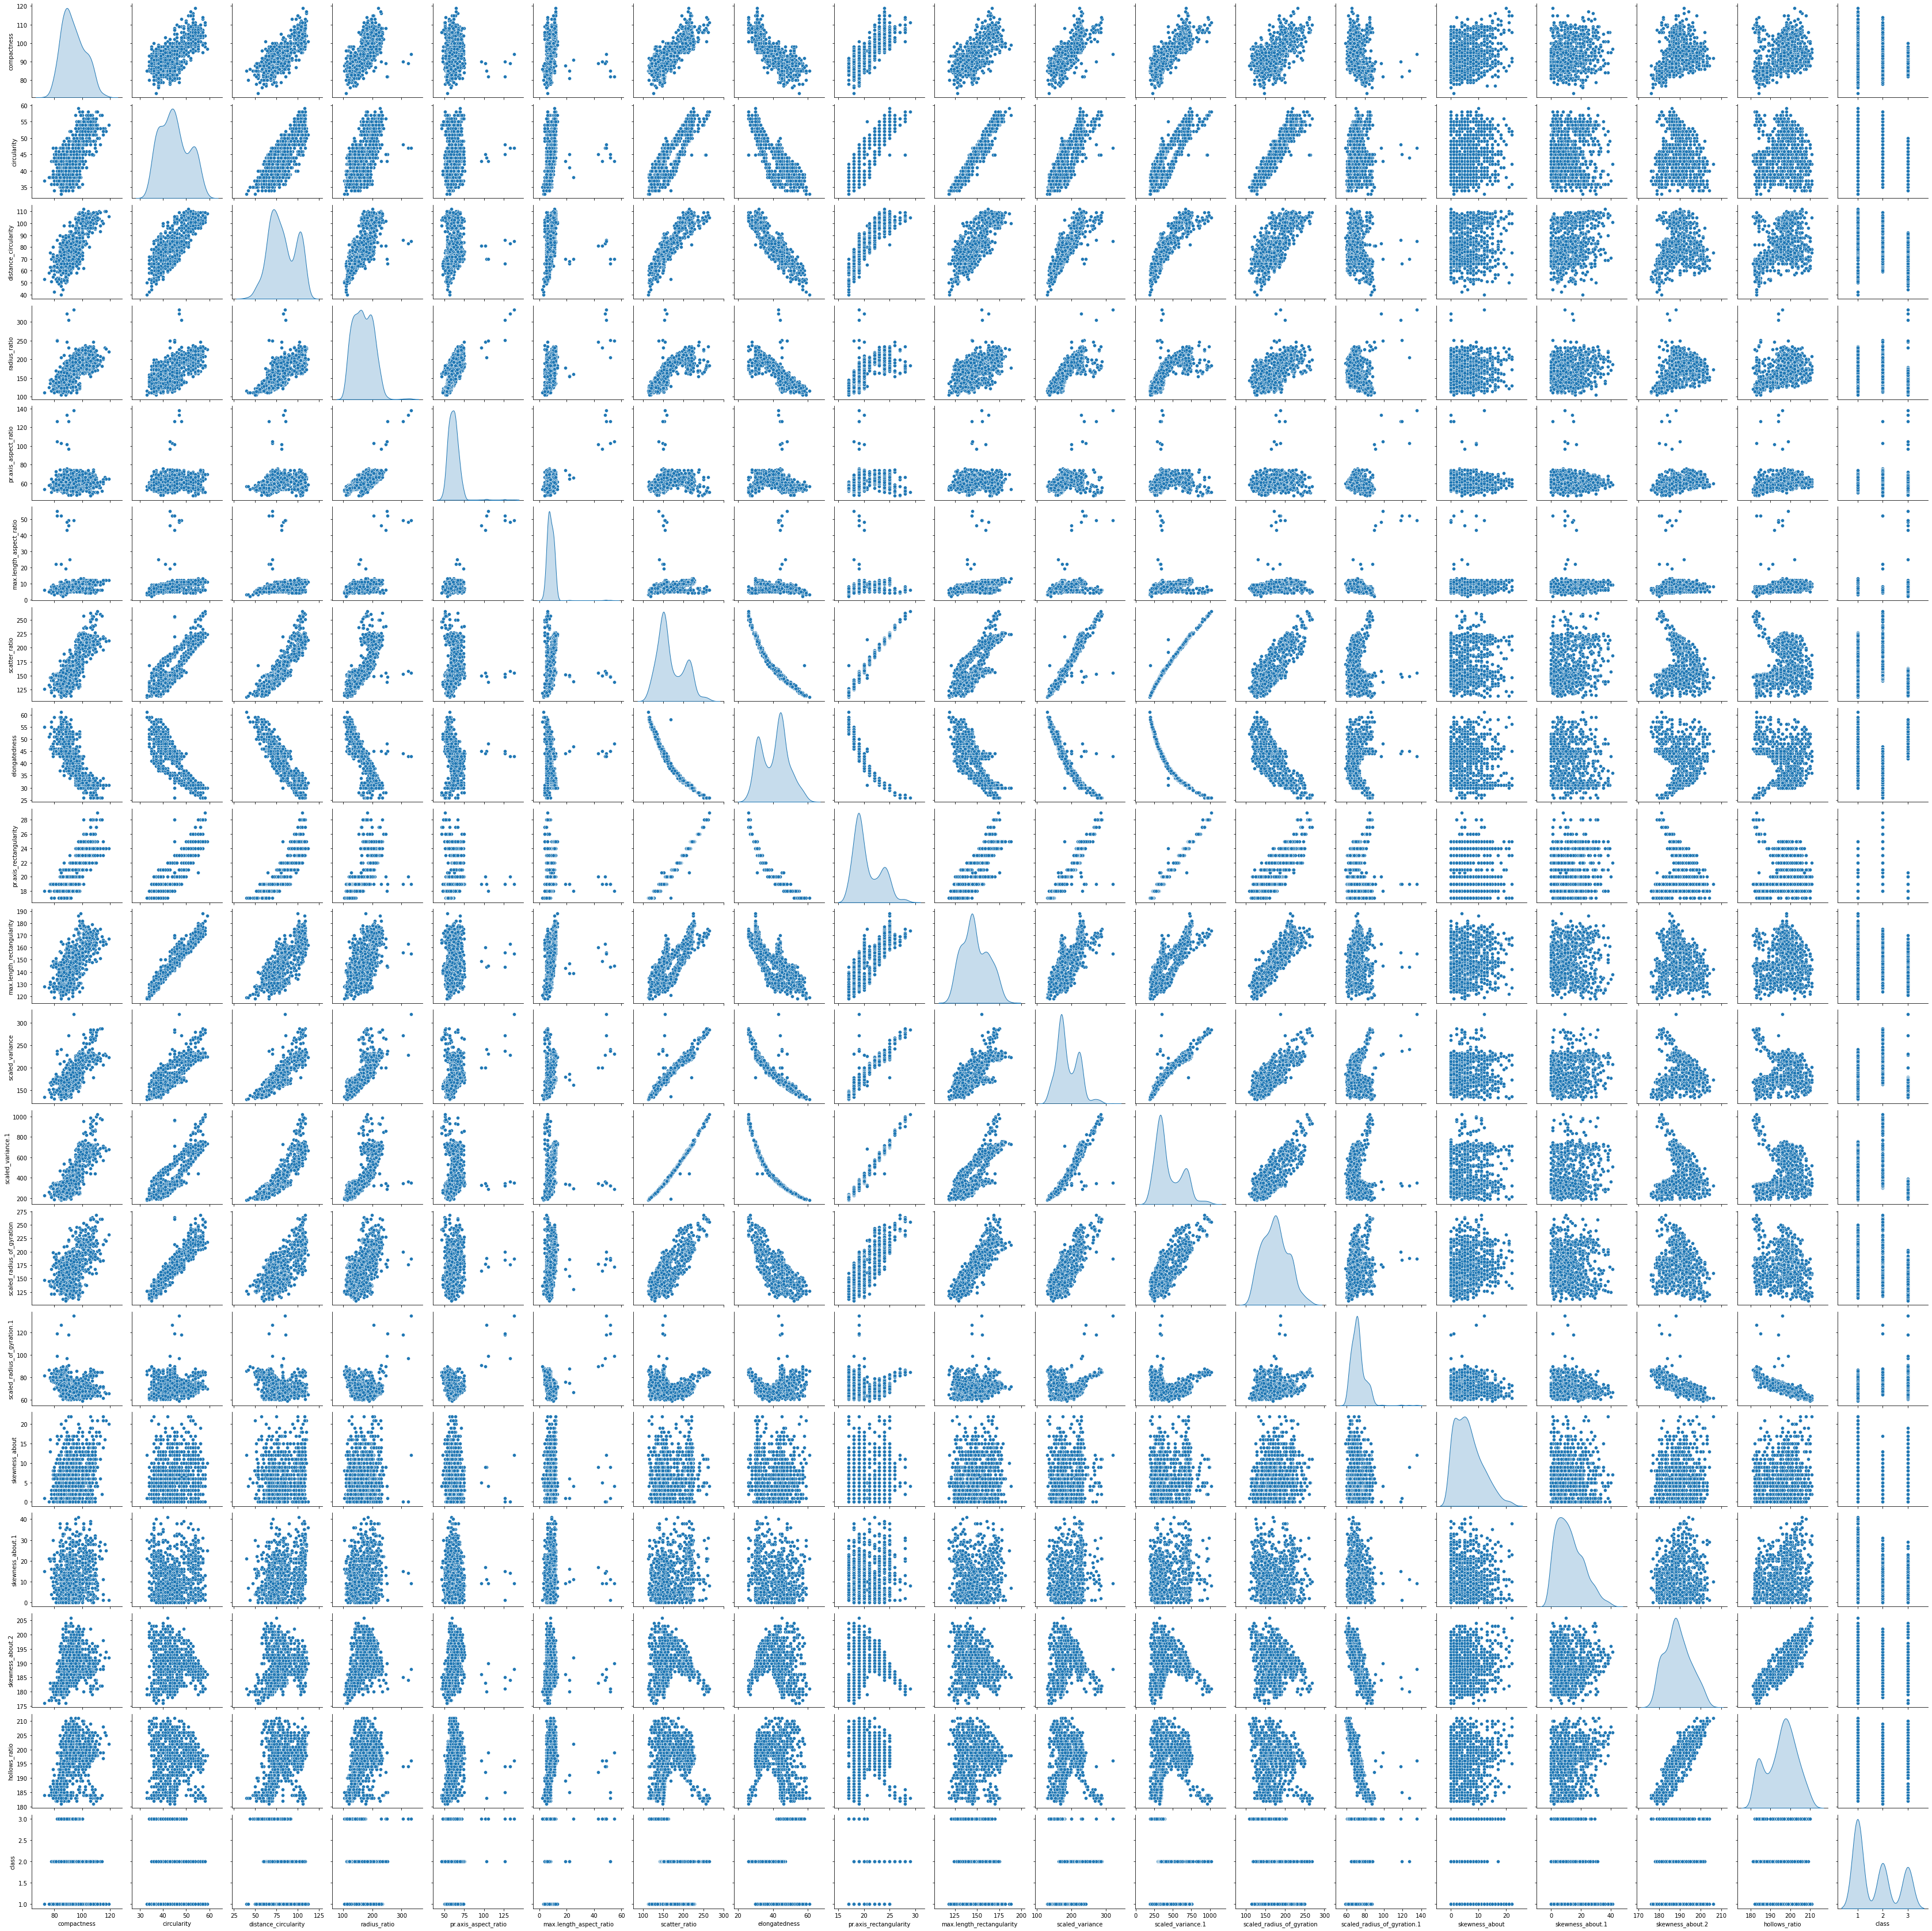

In [185]:
sns.pairplot(data,diag_kind='kde')  #pairplot
plt.show()

<AxesSubplot:>

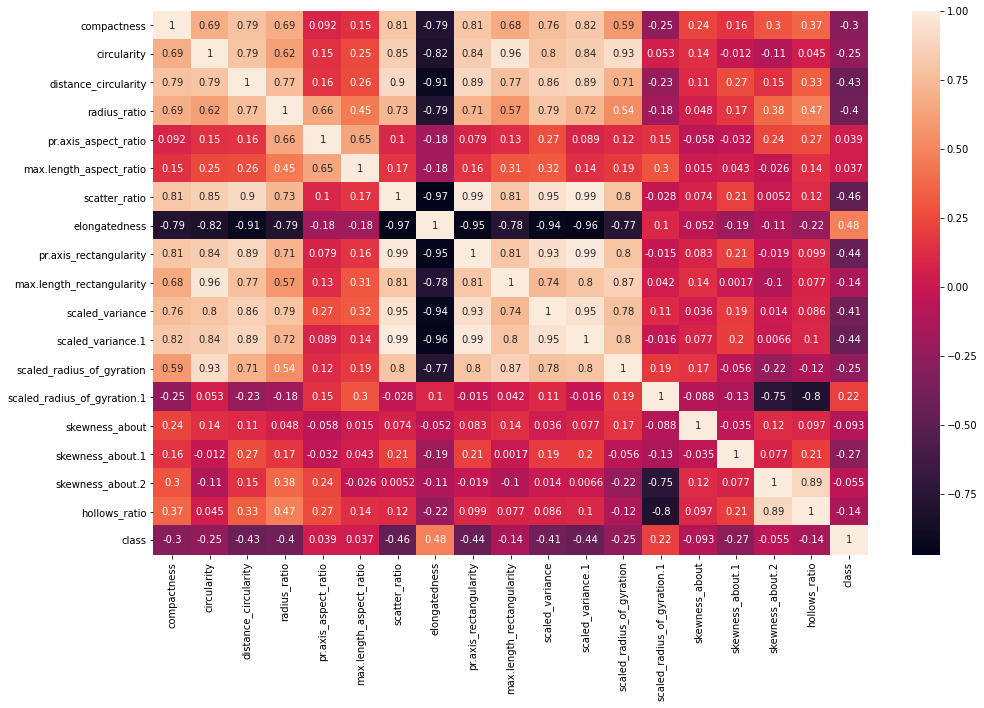

In [186]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot=True)

elongatedness and distance_circularity |
distance_circularity and scatter_ratio |
scatter_ratio and elongatedness |
scatter_ratio and pr.axis_rectangularity |
scaled_variance and elongatedness |
circularity and max.length_rectangularity |
scaled_variance.1 and scaled_variance     |          

shows very high correlations

Removing some of the very high correlated columns- elongatedness,pr.axis_rectangularity,scaled_variance.1 can be dropped

In [187]:
data.corr()["class"].sort_values(ascending= False)#correlation with target variable

class                          1.000000
elongatedness                  0.483326
scaled_radius_of_gyration.1    0.221288
pr.axis_aspect_ratio           0.038686
max.length_aspect_ratio        0.036942
skewness_about.2              -0.054890
skewness_about                -0.092923
max.length_rectangularity     -0.140152
hollows_ratio                 -0.142852
scaled_radius_of_gyration     -0.247706
circularity                   -0.251225
skewness_about.1              -0.271659
compactness                   -0.297774
radius_ratio                  -0.402095
scaled_variance               -0.407685
distance_circularity          -0.428136
scaled_variance.1             -0.444230
pr.axis_rectangularity        -0.444361
scatter_ratio                 -0.463979
Name: class, dtype: float64

pr.axis_aspect_ratio           0.038650 |
max.length_aspect_ratio        0.036942 |
skewness_about.2              -0.054890 |

shows very less correlation with the independend variable 

# Model 

In [307]:
data.head()
y=data['class']
x=data.drop(['class','elongatedness','pr.axis_rectangularity','scaled_variance.1'], axis=1)

In [308]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# Scale data
X = std.fit_transform(x)

In [309]:
from sklearn.model_selection import train_test_split
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [310]:
X_train.shape

(592, 15)

In [311]:
len(y_train)

592

In [312]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [313]:
clf = svm.SVC(gamma=0.025, C=8)   
clf.fit(X_train , y_train)
#y_pred = clf.predict(X_test)

SVC(C=8, gamma=0.025)

In [314]:
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.9566929133858267
[[123   1   2]
 [  0  64   3]
 [  3   2  56]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       126
           2       0.96      0.96      0.96        67
           3       0.92      0.92      0.92        61

    accuracy                           0.96       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254



In [315]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [317]:
num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.93023256 0.97674419 0.95348837 1.         0.97674419 0.95348837
 1.         1.         1.         1.         0.97619048 0.97619048
 0.97619048 1.         0.95238095 1.         0.95238095 0.95238095
 0.97619048 1.        ]
Accuracy: 97.763% (2.161%)


In [318]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [319]:
print(pca.explained_variance_ratio_)

[0.44603759 0.19916044 0.12199718 0.07584659 0.06060915 0.03317729
 0.0233393  0.01388082 0.01020675 0.00549394]


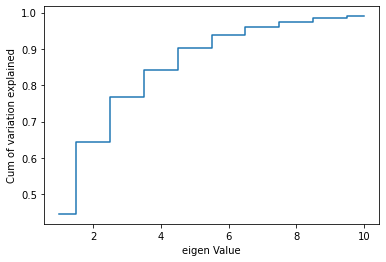

In [320]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

PCA with value 8 is what that capture
about 95% of the variance in the data

In [325]:
pca3 = PCA(n_components=8)
pca3.fit(X)

Xpca3 = pca3.transform(X)

In [326]:
from sklearn.model_selection import train_test_split
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.3,random_state=123)

In [327]:
clf2 = svm.SVC(gamma=0.025, C=8)   
clf2.fit(X_train , y_train)
#y_pred = clf.predict(X_test)

SVC(C=8, gamma=0.025)

In [328]:
predictions = clf2.predict(X_test)
score = clf2.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.9448818897637795
[[121   2   3]
 [  0  65   2]
 [  4   3  54]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       126
           2       0.93      0.97      0.95        67
           3       0.92      0.89      0.90        61

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



In [329]:
num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf2, Xpca3, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.93023256 0.95348837 0.95348837 1.         0.95348837 0.95348837
 0.97619048 0.97619048 0.92857143 0.97619048 0.95238095 0.97619048
 0.85714286 1.         0.9047619  0.92857143 0.95238095 0.95238095
 0.95238095 0.97619048]
Accuracy: 95.269% (3.189%)


accuracy scores and cross validation scores of Support vector machines – one trained using raw data 

Accuracy = 0.9566929133858267
[[123   1   2]
 [  0  64   3]
 [  3   2  56]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       126
           2       0.96      0.96      0.96        67
           3       0.92      0.92      0.92        61

    accuracy                           0.96       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254

Cross-validation score
Accuracy: 97.763% (2.161%)


accuracy scores and cross validation scores of Support vector machines – one trained using Principal Components

Accuracy = 0.9448818897637795
[[121   2   3]
 [  0  65   2]
 [  4   3  54]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       126
           2       0.93      0.97      0.95        67
           3       0.92      0.89      0.90        61

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254


Cross-validation score
Accuracy: 95.269% (3.189%)

Both the model performed comparitively same